# Damped Harmonic Oscillator and Schematic Mode-Coupling Theory

This document provides an in-depth overview of two related topics: the **Damped Harmonic Oscillator (DHO)** and a schematic version of the **Mode-Coupling Theory (MCT)** equation. Both models are used to describe dynamic phenomena, but while the DHO is linear and well understood, the schematic MCT equation introduces nonlinearity and memory effects, making it a powerful tool in complex systems like glassy dynamics and soft matter.

## Introduction

In many areas of physics, understanding oscillatory behavior under the influence of damping (or friction) is crucial. The **Damped Harmonic Oscillator (DHO)** is a classic example used to describe systems such as mechanical vibrations, electrical circuits, and even quantum systems in some approximations. The DHO is governed by a linear second-order differential equation that captures the essential physics of energy dissipation.

In contrast, the **Schematic MCT Equation** arises in the study of slow dynamics in dense liquids and glasses. It is an integro-differential equation that, in addition to standard oscillatory behavior, contains a memory term representing the history of the system’s evolution. This memory term makes the equation nonlinear and nonlocal in time, capturing complex relaxation phenomena observed in experiments.

## The Damped Harmonic Oscillator (DHO)

### Governing Equation

The standard equation of motion for the damped harmonic oscillator is:

$\ddot{x}(t) + 2\zeta\,\dot{x}(t) + \omega^2\,x(t) = 0,$

where:
- $x(t)$ is the displacement as a function of time,
- $\dot{x}(t)$ and $\ddot{x}(t)$ denote the first and second time derivatives (velocity and acceleration),
- $\omega$ is the angular frequency (often set with the simplifying assumption $\omega^2=1$),
- $\zeta$ is the damping coefficient (with the damping term $2\zeta$).

### Analytical Solution

Assuming $\omega^2=1$, we propose a solution of the form $x(t)=e^{\lambda t}$. Substituting this into the differential equation yields the **characteristic equation**:

$\lambda^2 + 2\zeta\,\lambda + 1 = 0.$

The roots of this quadratic determine the oscillator's behavior:

- **Underdamped ($\zeta < 1$)**: Complex conjugate roots lead to oscillatory behavior with an exponential decay.
- **Critically damped ($\zeta = 1$)**: A repeated real root gives the fastest return to equilibrium without oscillations.
- **Overdamped ($\zeta > 1$)**: Two distinct real roots yield a non-oscillatory, gradual return to equilibrium.

For the underdamped case, the general solution is:

$
x(t) = e^{-\zeta t}\left[C\cos\left(\sqrt{1-\zeta^2}\,t\right) + D\sin\left(\sqrt{1-\zeta^2}\,t\right)\right],
$

where $C$ and $D$ are constants determined by the initial conditions.

### Numerical Methods

In cases where analytical solutions are less practical—especially when exploring varying parameters—a numerical solution is required. One common method is the forward Euler or a more advanced Runge–Kutta method. In a basic forward Euler scheme, the updates are as follows:

1. **Compute acceleration:**
   $
   a(t) = -x(t) - 2\zeta\,\dot{x}(t)
   $
2. **Update velocity:**
   $
   \dot{x}(t+\Delta t) = \dot{x}(t) + a(t)\,\Delta t
   $
3. **Update displacement:**
   $
   x(t+\Delta t) = x(t) + \dot{x}(t)\,\Delta t
   $

This approach, while simple, is effective for small time steps and can be readily implemented in programming languages such as Python.

## The Schematic MCT Equation

### Governing Equation

The schematic MCT equation includes a **memory term** to account for non-Markovian dynamics that are commonly observed in complex fluids and glasses. A simplified version of the equation is:

$\displaystyle
\ddot{x}(t) + \omega^2\,x(t) + a\int_0^{t} \bigl[x(t-s)\bigr]^2\,\dot{x}(s)\,ds = 0,
$

with the parameter:

$
\displaystyle a = 2\zeta\omega.
$

Here, the memory term

$
\displaystyle \int_0^{t} \bigl[x(t-s)\bigr]^2\,\dot{x}(s)\,ds
$

represents the convolution of the squared displacement with the velocity over the system’s history, introducing nonlinearity and a dependence on past dynamics.

### Challenges and Numerical Approaches

Because of its nonlinearity and the integral memory kernel, analytical solutions for the schematic MCT equation are generally not available. Instead, numerical methods are employed. Some common strategies include:

- **Time Discretization:**  
  The continuous time is divided into intervals of size $\Delta t$. The integral is then approximated as a sum:
  
  $ \displaystyle
  \int_0^t \bigl[x(t-s)\bigr]^2\,\dot{x}(s)\,ds \approx \Delta t \sum_{j=0}^{n} \bigl[x(t_n-t_j)\bigr]^2\,\dot{x}(t_j),
  $
  
  with $t_n = n\Delta t$.
  
- **Iterative Methods:**  
  The nonlinear memory term often requires iterative schemes (such as fixed-point iterations) to solve, using an initial guess (often the DHO solution) to compute the integral and update the solution until convergence.

- **Hybrid Methods:**  
  Combining explicit integration schemes with numerical quadrature for the memory term is another effective approach for achieving accurate results over long time intervals.

## Comparison: DHO versus Schematic MCT

Although both the DHO and the schematic MCT equation describe oscillatory systems, they have notable differences:

- **Linearity vs. Nonlinearity:**  
  The DHO is linear, which allows for explicit analytical solutions and straightforward numerical integration. The schematic MCT, however, is nonlinear due to the memory term, resulting in more complex dynamics.

- **Memory Effects:**  
  In the DHO, the system’s future evolution depends solely on its current state. By contrast, the schematic MCT equation incorporates a memory kernel that considers the complete history of the system, making it essential for modeling slow relaxation and persistent correlations.

- **Applications:**  
  - **DHO:** Commonly applied in mechanical and electrical systems where energy dissipation through friction or resistance is present.
  - **Schematic MCT:** Particularly useful in studying glass transitions and complex fluid dynamics, where the interplay between structure and dynamics is critical.

## Numerical Implementation Example

Below is a simplified Python code snippet that demonstrates how both the DHO and the schematic MCT equations might be solved numerically. The example uses forward Euler integration for the DHO and includes a loop to handle the memory term in the MCT equation.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']

def mct_solver(x0, v0, zeta, dt, T):
    """
    Solves the schematic MCT equation:
      x''(t) + x(t) + a * ∫₀ᵗ [x(t-s)]² x'(s) ds = 0,
    where a = 2*zeta and ω² = 1.

    Parameters:
    -----------
    x0 : float
        Initial displacement x(0)
    v0 : float
        Initial velocity x'(0)
    zeta : float
        Damping parameter (a = 2*zeta)
    dt : float
        Time step for the solver
    T : float
        Total time for the simulation

    Returns:
    --------
    t : 1D numpy array
        Time grid from 0 to T.
    x : 1D numpy array
        Solution x(t)
    v : 1D numpy array
        Velocity x'(t)
    """
    a = 2 * zeta  # parameter as given
    N = int(T / dt) + 1
    t = np.linspace(0, T, N)

    # Allocate arrays to store displacement and velocity.
    x = np.zeros(N)
    v = np.zeros(N)
    x[0] = x0
    v[0] = v0

    # Main time-stepping loop using the forward Euler method.
    for n in range(N - 1):
        # Compute the memory integral at time t_n:
        # I(t_n) = ∫₀ᵗ [x(t_n-s)]² x'(s) ds ≈ dt * sum_{j=0}^{n} [x(t_n - t_j)]² * v(t_j)
        # With the substitution t_n - t_j -> index (n - j).
        I = 0.0
        for j in range(n + 1):
            I += (x[n - j] ** 2) * v[j]
        I *= dt

        # The acceleration from the equation:
        # x''(t) = - x(t) - a * I(t)
        acceleration = - x[n] - a * I

        # Update using forward Euler:
        v[n + 1] = v[n] + acceleration * dt
        x[n + 1] = x[n] + v[n] * dt  # using current velocity; can also use v[n+1] for modified Euler

    return t, x, v

def dho_solver(x0, v0, zeta, dt, T):
    """
    Numerically solves the damped harmonic oscillator:
         x''(t) + 2*zeta * x'(t) + x(t) = 0,
    using the forward Euler method.

    Parameters:
    -----------
    x0 : float
        Initial displacement at t=0
    v0 : float
        Initial velocity at t=0
    zeta : float
        Damping coefficient (damping term = 2*zeta)
    dt : float
        Time step used for integration
    T : float
        Total integration time

    Returns:
    --------
    t : 1D numpy array
        Array of time points
    x : 1D numpy array
        Array of displacements x(t)
    v : 1D numpy array
        Array of velocities x'(t)
    """
    # Calculate the number of time steps.
    N = int(T/dt) + 1
    t = np.linspace(0, T, N)

    # Initialize arrays for displacement and velocity.
    x = np.zeros(N)
    v = np.zeros(N)
    x[0] = x0
    v[0] = v0

    # Time stepping loop using forward Euler.
    for n in range(N - 1):
        # The acceleration is given by:
        # x''(t) = -x(t) - 2*zeta*v(t)
        acceleration = - x[n] - 2*zeta * v[n]

        # Update velocity and displacement.
        v[n+1] = v[n] + acceleration * dt
        x[n+1] = x[n] + v[n] * dt  # using the velocity at the beginning of the interval

    return t, x, v

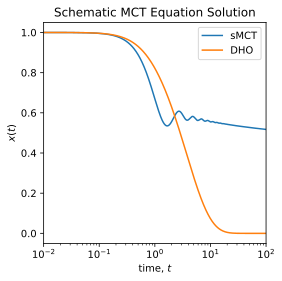

In [10]:
# Parameters for the simulation.
x0 = 1.0            # initial displacement
v0 = 0.0            # initial velocity
zeta = 3.99/2.00    # damping parameter (you can change this to study different behaviors)
dt = 0.01           # time step (choose a small dt for better accuracy)
T = 100.0           # total time of simulation

# Run the MCT solver.
t_MCT, x_MCT, v_MCT = mct_solver(x0, v0, zeta, dt, T)
# Run the DHO solver.
t_DHO, x_DHO, v_DHO = dho_solver(x0, v0, zeta, dt, T)

# Plot the solution.
plt.figure(figsize=(4, 4))
plt.plot(t_MCT, x_MCT, label='sMCT')
plt.plot(t_DHO, x_DHO, label='DHO')
plt.xlabel(r'time, $t$')
plt.ylabel(r'$x(t)$')
plt.xscale('log')
plt.xlim(1e-2,1e2)
plt.title('Schematic MCT Equation Solution')
plt.legend()
plt.grid(False)
plt.show()

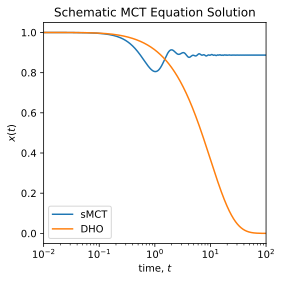

In [12]:
# Parameters for the simulation.
x0 = 1.0            # initial displacement
v0 = 0.0            # initial velocity
zeta = 10.00/2.00    # damping parameter (you can change this to study different behaviors)
dt = 0.01           # time step (choose a small dt for better accuracy)
T = 100.0           # total time of simulation

# Run the MCT solver.
t_MCT, x_MCT, v_MCT = mct_solver(x0, v0, zeta, dt, T)
# Run the DHO solver.
t_DHO, x_DHO, v_DHO = dho_solver(x0, v0, zeta, dt, T)

# Plot the solution.
plt.figure(figsize=(4, 4))
plt.plot(t_MCT, x_MCT, label='sMCT')
plt.plot(t_DHO, x_DHO, label='DHO')
plt.xlabel(r'time, $t$')
plt.ylabel(r'$x(t)$')
plt.xscale('log')
plt.xlim(1e-2,1e2)
plt.title('Schematic MCT Equation Solution')
plt.legend()
plt.grid(False)
plt.show()

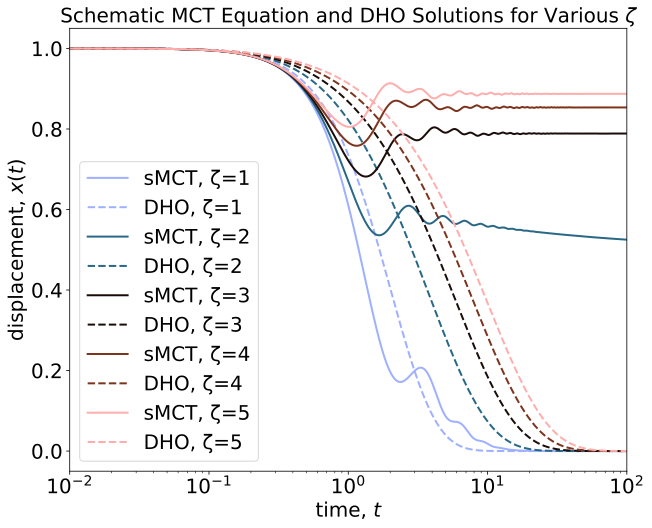

In [15]:
# Parameters for the simulation.
x0 = 1.0            # initial displacement
v0 = 0.0            # initial velocity
dt = 0.01           # time step
T = 100.0           # total time of simulation

# List of zeta values we want to scan.
zeta_values = [1, 2, 3, 4, 5]

# Create a colormap with the same number of colors as zeta values.
colors = plt.cm.berlin(np.linspace(0, 1, len(zeta_values)))

plt.figure(figsize=(10, 8))

# Loop over the different zeta values.
for i, zeta in enumerate(zeta_values):
    # Use the same color for both curves for each ζ value.
    col = colors[i]

    # Run the solvers.
    t_MCT, x_MCT, v_MCT = mct_solver(x0, v0, zeta, dt, T)
    t_DHO, x_DHO, v_DHO = dho_solver(x0, v0, zeta, dt, T)

    # Plot the MCT solution with a solid line.
    plt.plot(t_MCT, x_MCT, color=col, label=f'sMCT, ζ={zeta}', lw=2)
    # Plot the DHO solution with a dashed line.
    plt.plot(t_DHO, x_DHO, '--', color=col, label=f'DHO, ζ={zeta}', lw=2)

plt.xlabel(r'time, $t$', fontsize=20)
plt.ylabel(r'displacement, $x(t)$', fontsize=20)
plt.xscale('log')
plt.xlim(1e-2, 1e2)
plt.title(r'Schematic MCT Equation and DHO Solutions for Various $\zeta$', fontsize=20)
plt.legend(fontsize=20, ncol=1)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(False)
plt.show()

# Conclusion
The study of oscillatory systems is enriched by comparing the simple yet fundamental Damped Harmonic Oscillator with more complex formulations such as the schematic Mode-Coupling Theory equation. While the DHO’s linearity leads to clear analytical and numerical solutions, the schematic MCT equation, with its inherent nonlinearity and memory effects, offers valuable insights into the complex dynamics of many-body systems encountered in soft matter and glass physics.

Understanding and numerically solving these equations not only advances theoretical research but also facilitates practical applications in systems where damping and memory effects play pivotal roles.